In [16]:
!pip install numpy
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 31.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 19.9 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 37.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 41.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 11.2 MB/s eta 0:00:00


In [4]:
import numpy as np

In [6]:
# Take the input variable values (inputs), weights (randomly initialized if this is the first iteration), 
# and the actual outputs in the provided dataset as the parameters of the feed_forward function

# To make this exercise a little more realistic, we will have bias associated with each node. Thus the 
# weights array will contain not only the weights connecting different nodes but also the bias associated 
# with nodes in hidden/ output layers.


def feed_forward(inputs, outputs, weights):
    weight_between_input_to_hidden_layer = weights[0]
    bias_between_input_to_hidden_layer = weights[1]
    pre_hidden = np.dot(inputs, weight_between_input_to_hidden_layer) + bias_between_input_to_hidden_layer

    # Apply the sigmoid activation function on top of the hidden layer values obtained in the previous step – pre_hidden:
    hidden = 1/(1 + np.exp(-pre_hidden)) # We will define separate func for activation next

    weight_between_hidden_to_output_layer = weights[2]
    bias_between_hidden_to_output_layer = weights[3]

    # Calculate output by dot producting hidden layer with weights connected to output layer
    output_prediction = np.dot(hidden, weight_between_hidden_to_output_layer) + bias_between_hidden_to_output_layer

    # Calculate error
    mean_squared_error = np.mean(np.square(output_prediction - outputs))
                                 
    return mean_squared_error

In [9]:
# Definining Activation Functions 

def tanh(x): 
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def relu(x):       
    return np.where(x>0,x,0)

def linear(x):       
    return x

# Unlike other activations, softmax is performed on top of an array of values. 
# This is generally done to determine the probability of an input belonging to one 
# of the m number of possible output classes in a given scenario. Let's say we are 
# trying to classify an image of a digit into one of the possible 10 classes (numbers from 0 to 9). 
# In this case, there are 10 output values, where each output value should represent 
#the probability of an input image belonging to one of the 10 classes.

def softmax(x):       
    return np.exp(x)/np.sum(np.exp(x))

# Here’s how it works:

# Input Vector: Suppose you have a vector 

# Exponential: Apply the exponential function to each element of the vector, which gives 
# a new vector

# Normalization: Divide each exponential by the sum of all exponentials in the vector. 
# This ensures that the sum of all output values of the softmax function is 1, forming a 
# valid probability distribution.

In [11]:
# Definining Loss Functions 

# The mean squared error is typically used when trying to predict a value that is continuous in nature.
def mse(p, y):   
    return np.mean(np.square(p - y))

# Similar to the mean squared error, the mean absolute error is generally employed on continuous variables. 
# Further, in general, it is preferable to have a mean absolute error as a loss function when the outputs to predict 
# have a value less than 1, as the mean squared error would reduce the magnitude of loss considerably (the square of a number between 1 and -1 is an even smaller number) when the expected output is less than 1.
# The mean absolute error between an array of predicted output values (p) and an array of actual output values (y) is implemented as follows: 
def mae(p, y):       
    return np.mean(np.abs(p-y))


# Binary Cross Entropy
# Cross-entropy is a measure of the difference between two different distributions: actual and predicted. 
# Binary cross-entropy is applied to binary output data
# Binary cross-entropy loss has a high value when the predicted value is far away from the actual value and a low value when the predicted and actual values are close.

def binary_cross_entropy(p, y):      
    return -np.mean(np.sum((y*np.log(p)+(1-y)*np.log(1-p))))


# Categorical cross-entropy between an array of predicted values (p) and an array of actual values (y) is implemented as follows: 
def categorical_cross_entropy(p, y):         
    return -np.mean(np.sum(y*np.log(p)))

In [ ]:
# Now we will learn about backpropagation, a technique to adjust weights so that they will result in a loss 
# that is as small as possible.

# In feedforward propagation, we connected the input layer to the hidden layer, which then was connected to the output layer.
# In the first iteration, we initialized weights randomly and then calculated the loss resulting from those weight values. 
# In backpropagation, we take the reverse approach. We start with the loss value obtained in feedforward propagation and 
# update the weights of the network in such a way that the loss value is minimized as much as possible.

# The loss value is reduced as we perform the following steps: 
# 1. Change each weight within the neural network by a small amount – one at a time. 
# 2. Measure the change in loss ( ∂L ) when the weight value is changed ( ∂W ). 
# 3. Update the weight by -k . ∂L/∂W  (where k is a positive value and is a hyperparameter known as the learning rate).

# Note that the update made to a particular weight is proportional to the amount of loss that is reduced by changing it 
# by a small amount. Intuitively, if changing a weight reduces the loss by a large value, then we can update the weight 
# by a large amount. However, if the loss reduction is small by changing the weight, then we update it only by a small amount.

# If the preceding steps are performed n number of times on the entire dataset (where we have done both the 
# feedforward propagation and backpropagation), it essentially results in training for n epochs.

# Q: Is it practical to update every single weight (millions or billions) in a production setting while training models?

# As a typical neural network contains thousands/millions (if not billions) of weights, changing the value of each weight, 
# and checking whether the loss increased or decreased is not optimal. The core step in the preceding list is the measurement
# of "change of loss" when the weight is changed. As you might have studied in calculus, measuring this is the same as 
# computing the gradient of loss concerning the weight. There's more on leveraging partial derivatives from calculus to 
# calculate the gradient of the loss concerning the weight in the next section, on the chain rule for backpropagation.


In [12]:
# Lets understand one addition concept, Learning Rate before we implement backpropagation

# Intuitively, the learning rate helps in building trust in the algorithm. For example, 
# when deciding on the magnitude of the weight update, we would potentially not change the weight value by a big amount 
# in one go but update it more slowly. This results in obtaining stability in our model;

# This whole process by which we update weights to reduce errors is called gradient descent.

# Stochastic gradient descent is how errors are minimized in the preceding scenario. As mentioned earlier, 
# gradient stands for the difference (which is the difference in loss values when the weight value is updated by 
# a small amount) and descent means to reduce. Stochastic stands for the selection of random samples based on which 
# a decision is taken.

# Apart from stochastic gradient descent, many other similar optimizers help to minimize loss values, will discuss them later.


In [16]:
# Gradient Descent in Code
from copy import deepcopy

def feed_forward(inputs, outputs, weights):
    weight_between_input_to_hidden_layer = weights[0]
    bias_between_input_to_hidden_layer = weights[1]
    pre_hidden = np.dot(inputs, weight_between_input_to_hidden_layer) + bias_between_input_to_hidden_layer

    # Apply the sigmoid activation function on top of the hidden layer values obtained in the previous step – pre_hidden:
    hidden = 1/(1 + np.exp(-pre_hidden)) # We will define separate func for activation next

    weight_between_hidden_to_output_layer = weights[2]
    bias_between_hidden_to_output_layer = weights[3]

    # Calculate output by dot producting hidden layer with weights connected to output layer
    output_prediction = np.dot(hidden, weight_between_hidden_to_output_layer) + bias_between_hidden_to_output_layer

    # Calculate error
    mean_squared_error = np.mean(np.square(output_prediction - outputs))
                                 
    return mean_squared_error
    

# Increase each weight and bias value by a very small amount (0.0001) and calculate the overall 
# squared error loss value one at a time for each of the weight and bias updates.

def update_weights(inputs, outputs, weights, lr):
    # Ensure that you deepcopy the list of weights. As the weights will be manipulated in later steps, 
    # deepcopy ensures we can work with multiple copies of weights without disturbing actual weights. 
    # We will create three copies of the original set of weights that were passed as an input to the function – 
    # 1. original_weights, 2. temp_weights, and 3. updated_weights:

    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)

    # Calculate the loss value (original_loss) with the original set of weights by passing inputs, outputs, and original_weights 
    # through the feed_forward function:
    original_loss = feed_forward(inputs, outputs, original_weights)

    # Loop through all the layers of the network:
    for i, layer in enumerate(original_weights):
        # There are a total of four lists of parameters within our neural network – 
        # two lists for the weight and bias parameters that connect the input to the 
        # hidden layer and another two lists for the weight and bias parameters that 
        # connect the hidden layer to the output layer. Now, we loop through all the 
        # individual parameters and because each list has a different shape, we leverage
        # np.ndenumerate to loop through each parameter within a given list
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            # We calculate the gradient (change in loss value) due to the weight change:
            grad = (_loss_plus - original_loss)/(0.0001)
            # This ^  process of updating a parameter by a very small amount and then 
            # calculating the gradient is equivalent to the process of differentiation.

            # Finally, we update the parameter present in the corresponding ith layer and
            # index, of updated_weights. The updated weight value will be reduced in 
            # proportion to the value of the gradient. Further, instead of completely reducing
            # it by a value equal to the gradient value, we bring in a mechanism to build trust 
            # slowly by using the learning rate – lr
            updated_weights[i][index] -= grad*lr

    # Once the parameter values across all layers and indices within layers are updated,
    # we return the updated weight values – updated_weights:
    return updated_weights, original_loss


# In the preceding scenario, we considered all the data points to calculate the loss (mean squared error) value. 
# However, in practice, when we have thousands (or in some cases, millions) of data points, 
# the incremental contribution of a greater number of data points while calculating the loss value 
# would follow the law of diminishing returns, and hence we would be using a batch size that is much smaller 
# compared to the total number of data points we have. We will apply gradient descent (after feedforward propagation) 
# using one batch at a time until we exhaust all data points within one epoch of training. 

# The typical batch size considered in building a model is anywhere between 32 and 1,024.

# In this section, we learned about updating weight values based on the change in 
# loss values when the weight values are changed by a small amount. 

# In the next section, we will learn about how weights can be updated without computing
# gradients one gradient at a time.

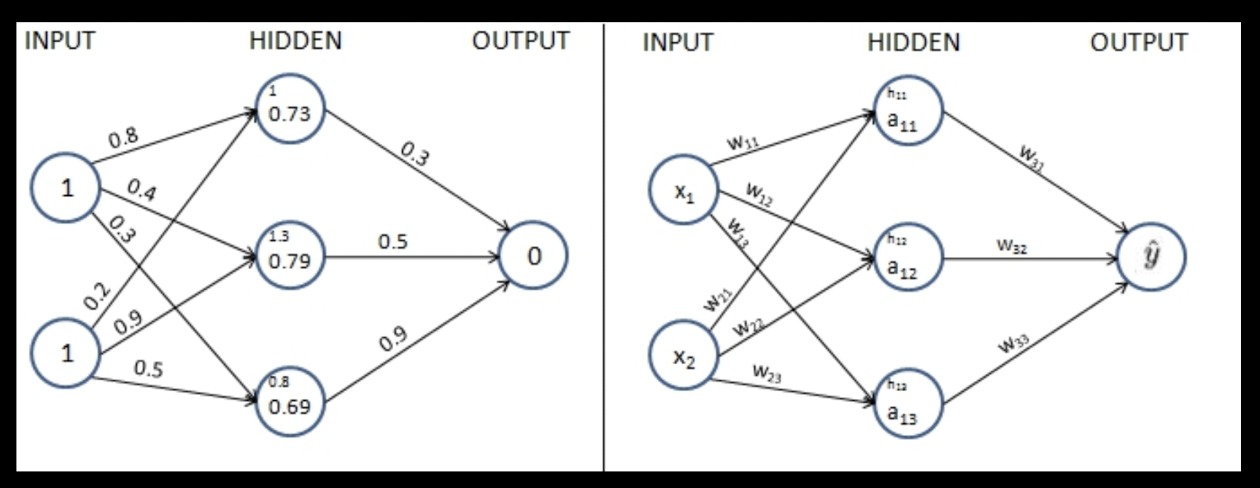

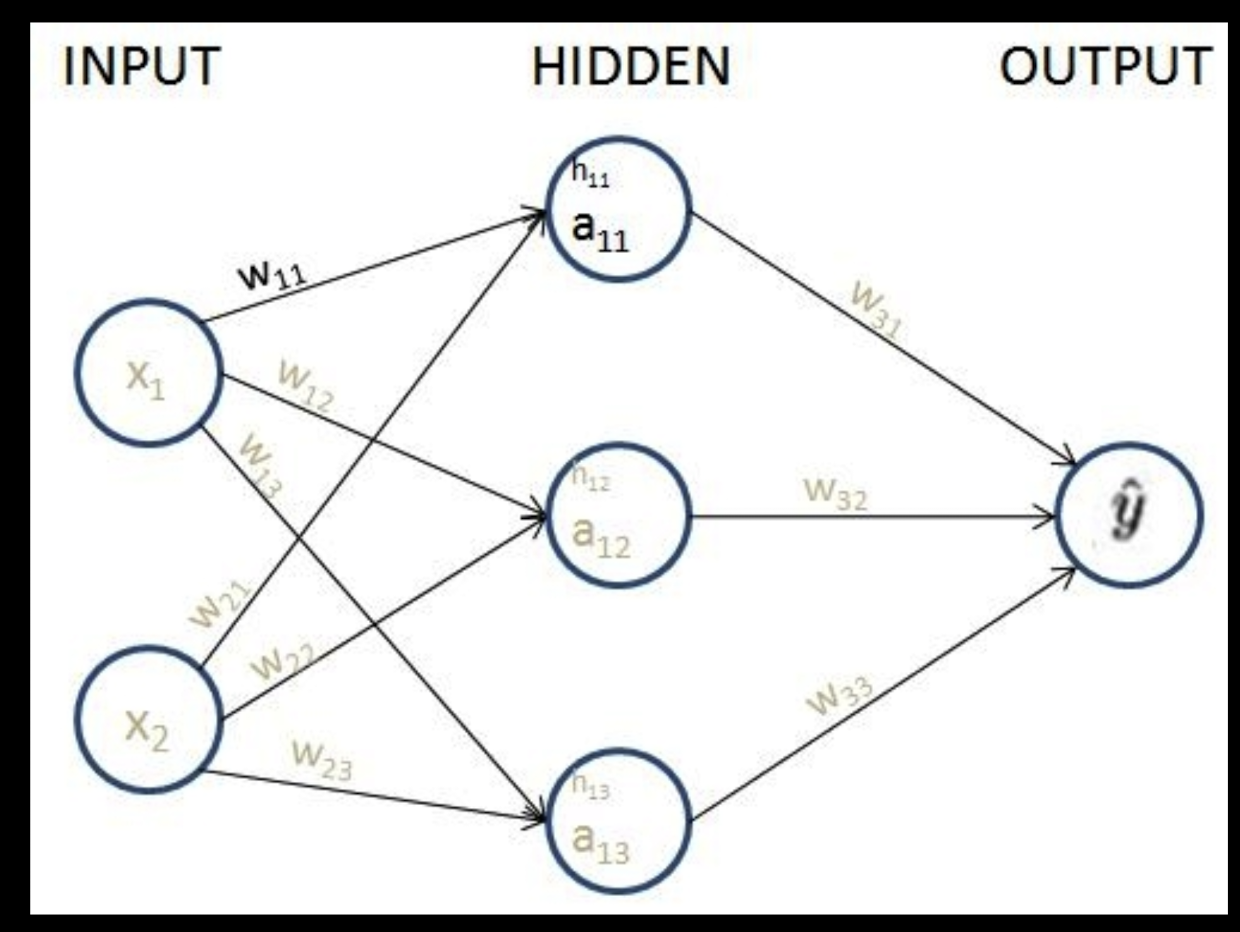

In [ ]:
# Implementing backpropagation using the chain rule

# Loss Function aka Cost for continous value prediction is MSE
# MSE(C) = (y-y~)^2  ------ NOTE: I am using y~ for y hat or y^

# The predicted output value  is calculated as follows:

# y~ = a11 * w31 + a12 * w32 + a13 * w33

# The hidden layer activation value (sigmoid activation) is calculated as follows:

# a11 = 1/(1+e^h11)

# The hidden layer value is calculated as follows:
# h11 = x1 * w11 + x2 * w21

# Now that we have formulated all the equations, let's calculate the impact of the change in the loss value (C) with respect to 
# the change in weight w11  as follows:

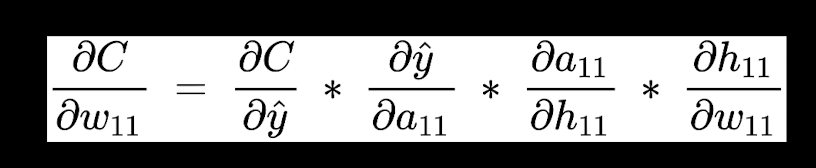

In [1]:
# This is called a chain rule. Essentially, we are performing a chain of differentiations to fetch the differentiation of our interest.

In [2]:
# We have built a chain of partial differential equations in such a way that we are now able to perform partial differentiation on
# each of the four components individually and ultimately calculate the derivative of the loss value with respect to weight value w11

# The individual partial derivatives in the preceding equation are computed as follows:
# The partial derivative of the loss value with respect to the predicted output value y~ is as follows:

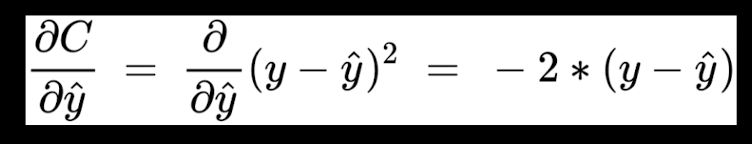

In [3]:
# The partial derivative of the predicted output value y~ with respect to the hidden layer activation value a11 is as follows:

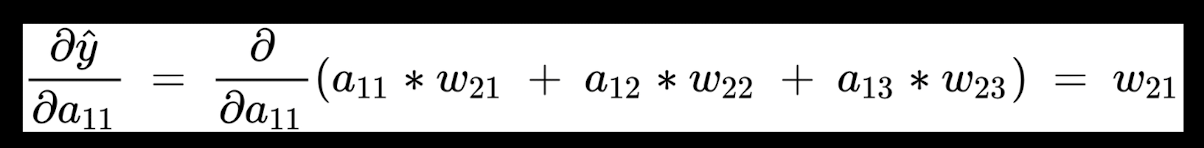

In [ ]:
# The partial derivative of the hidden layer activation value a11  with respect to the hidden layer h11 value prior to activation  
# is as follows:

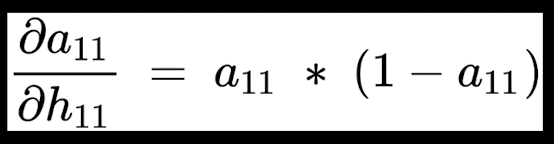

In [6]:
# The above equation comes from the fact that the derivative of the sigmoid function a is a * (1-a)

In [7]:
# The partial derivative of the hidden layer h11 value prior to activation  with respect to the weight w11 value  is as follows:

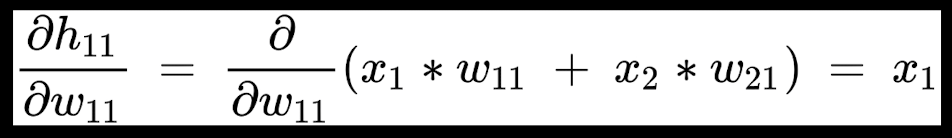

In [8]:
# With this in place, the gradient of the loss value with respect to  is calculated by replacing each of the partial differentiation 
# terms with the corresponding value as calculated in the previous steps as follows:

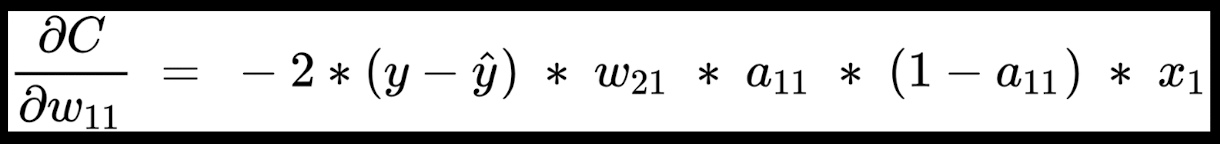

In [9]:
#From the preceding formula, we can see that we are now able to calculate the impact on the loss value of a small change 
# in the weight value (the gradient of the loss with respect to weight) without brute-forcing our way by recomputing the 
# feedforward propagation again.

In [10]:
# Next, we will go ahead and update the weight value as follows:
# updated weight = original weight - (learning rate) * gradient of loss wrt weight

In [17]:
import numpy as np 
from copy import deepcopy
import matplotlib.pyplot as plt

x = np.array([[1,1]])
y = np.array([[0]])

def line():
    print('='*80)
def feed_forward(inputs, outputs, weights):     
    pre_hidden = np.dot(inputs,weights[0])+ weights[1]
    hidden = 1/(1+np.exp(-pre_hidden))
    out = np.dot(hidden, weights[2]) + weights[3]
    mean_squared_error = np.mean(np.square(out - outputs))
    return mean_squared_error

def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    original_loss = feed_forward(inputs, outputs, original_weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights, original_loss

Matplotlib is building the font cache; this may take a moment.


In [18]:
# Sample weights

W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T, 
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32), 
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T, 
    np.array([-0.5516], dtype=np.float32)
]

Text(0.5, 1.0, 'Loss over increasing number of epochs')

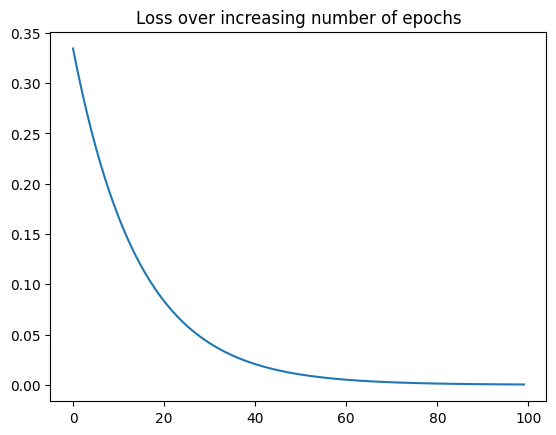

In [19]:
losses = []
for epoch in range(100):
    W, loss = update_weights(x,y,W,0.01)
    losses.append(loss)
plt.plot(losses)
plt.title('Loss over increasing number of epochs')

In [21]:
# Lets check updated weights W
W

[array([[ 0.01424004, -0.5907864 , -0.27549535],
        [ 0.39883757, -0.52918637,  0.18640439]], dtype=float32),
 array([ 0.00554004,  0.5519136 , -0.06599568], dtype=float32),
 array([[ 0.3475135 ],
        [-0.05529078],
        [ 0.03760847]], dtype=float32),
 array([-0.22443289], dtype=float32)]

In [23]:
pre_hidden = np.dot(x,W[0]) + W[1]
hidden = 1/(1+np.exp(-pre_hidden))
out = np.dot(hidden, W[2]) + W[3]

In [24]:
out

array([[-0.0174781]])

In [26]:
# In gradient descent, we performed the weight update process sequentially (one weight at a time). 
# By leveraging the chain rule, we learned that there is an alternative way to calculate the impact of a change 
# in weight by a small amount on the loss value, however, with an opportunity to perform computations in parallel.

# Because we are updating parameters across all layers, the whole process of updating parameters can be parallelized. 
# Further, given that in a realistic scenario, there can exist millions of parameters across layers, performing the 
# calculation for each parameter on a different core of GPU results in the time taken to update weights is a much faster
# exercise than looping through each weight, one at a time.

# TODO: Learn how parallelism is actually implemented in Pytorch and other frameworks

In [27]:
# we will build a simple neural network with a hidden layer that connects the input to the output on the same toy dataset
# that we worked on in the Feedforward propagation in code section and also leverage the update_weights function that we defined 
# in the previous section to perform backpropagation to obtain the optimal weight and bias values.

# We define the model as follows: 
# 1. The input is connected to a hidden layer that has three units/ nodes. 
# 2. The hidden layer is connected to the output, which has one unit in the output layer.

In [30]:
from copy import deepcopy
import numpy as np 
x = np.array([[1,1]])
y = np.array([[0]])

# Lets intialize random weights with following setup:

# The hidden layer has three units in it and each input node is connected to each of the hidden layer units. 
# Hence, there are a total of six weight values and three bias values – one bias and two weights (two weights coming from two input nodes) 
# corresponding to each of the hidden units. 

# Additionally, the final layer has one unit that is connected to the three units of the hidden layer. 
# Hence, a total of three weights and one bias dictate the value of the output layer. The randomly initialized weights are as follows:

W = [
    np.array([[-0.0053, 0.3793], # Correspond to the 2 x 3 matrix of weights that connect the input layer to the hidden layer.
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T, # Transpose it
    
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32), # the bias values associated with each node of the hidden layer.
    
    np.array([[ 0.1528,-0.1745,-0.1135]],dtype=np.float32).T, # the 3 x 1 matrix of weights joining the hidden layer to the output layer

    np.array([-0.5516], dtype=np.float32) # bias associated with the output layer.
]

In [31]:
def feed_forward(inputs, outputs, weights):     
    pre_hidden = np.dot(inputs,weights[0])+ weights[1]
    hidden = 1/(1+np.exp(-pre_hidden))
    out = np.dot(hidden, weights[2]) + weights[3]
    mean_squared_error = np.mean(np.square(out - outputs))
    return mean_squared_error

In [32]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    original_loss = feed_forward(inputs, outputs, original_weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights, original_loss

Text(0.5, 1.0, 'Loss over increasing number of epochs')

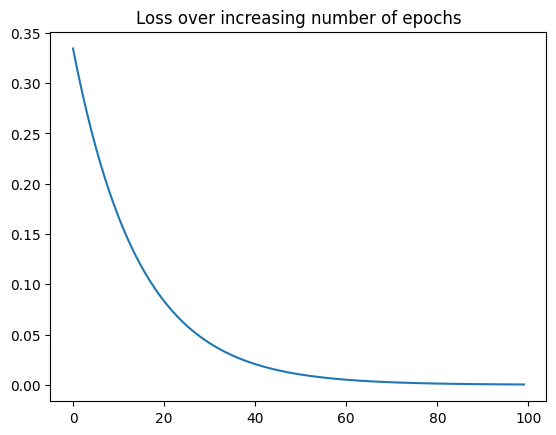

In [33]:
# Update weights over 100 epochs and fetch the loss value and the updated weight values:
losses = []
for epoch in range(100):
    W, loss = update_weights(x,y,W,0.01)
    losses.append(loss)
plt.plot(losses)
plt.title('Loss over increasing number of epochs')

In [34]:
# As you can see, the loss started at around 0.33 and steadily dropped to around 0.0001.
# This is an indication that weights are adjusted according to the input-output data and when an input is given, 
# we can expect it to predict the output that we have been comparing it against in the loss function. 

# The output weights are as follows:
W

[array([[ 0.01424004, -0.5907864 , -0.27549535],
        [ 0.39883757, -0.52918637,  0.18640439]], dtype=float32),
 array([ 0.00554004,  0.5519136 , -0.06599568], dtype=float32),
 array([[ 0.3475135 ],
        [-0.05529078],
        [ 0.03760847]], dtype=float32),
 array([-0.22443289], dtype=float32)]

In [36]:
# Since we now have updated weights, make the predictions for the input by passing the input through the network and calculate the 
# output value:

pre_hidden = np.dot(x,W[0]) + W[1]
hidden = 1/(1+np.exp(-pre_hidden))
pred_out = np.dot(hidden, W[2]) + W[3]
pred_out

array([[-0.0174781]])

In [37]:
# The output of the preceding code is the value of -0.017, which is a value that is very close to the expected output of 0. 
# As we train for more epochs, the pred_out value gets even closer to 0.

In [41]:
# Understanding the impact of learning rate

# Assume a network y = 3x

# Sample input
x = [[1],[2],[3],[4]]

# Sample output
y = [[3],[6],[9],[12]]

# Define the feed_forward function in such a way that we do not have a hidden layer and the architecture is y = w.x + b

from copy import deepcopy
import numpy as np
def feed_forward(inputs, outputs, weights):
    out = np.dot(inputs,weights[0])+ weights[1]
    mean_squared_error = np.mean(np.square(out - outputs))
    return mean_squared_error

def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = feed_forward(inputs, outputs, original_weights)
    updated_weights = deepcopy(weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - org_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights

In [43]:
# Initialize weight and bias values to a random value: 
W = [np.array([[0]], dtype=np.float32),  # weight
     np.array([[0]], dtype=np.float32)] # bias

In [44]:
# Let's leverage the update_weights function with a learning rate of 0.01, loop through 1,000 iterations, 
# and check how the weight value (W) varies over increasing epochs:

weight_value = []
for epx in range(1000):
    W = update_weights(x,y,W,0.01) # lr= 0.01
    weight_value.append(W[0][0][0])

Text(0, 0.5, 'Weight value')

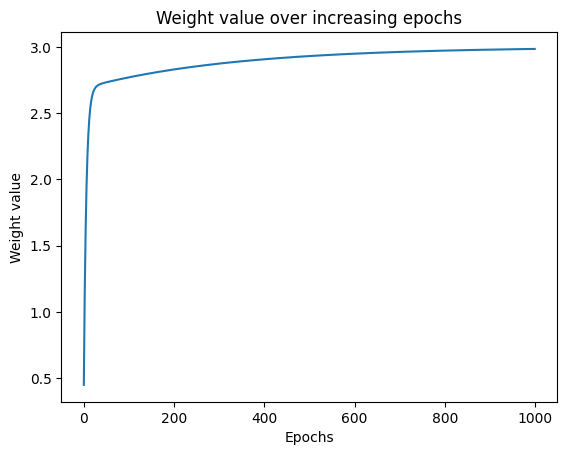

In [45]:
# Note that, in this code, we are using a learning rate of 0.01 and repeating the update_weights function to fetch 
# the modified weight at the end of each epoch. Further, in each epoch, we gave the most recent updated weight as an input to 
# fetch the updated weight in the next epoch.

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value)
plt.title('Weight value over increasing epochs')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

In [46]:
# The weight value gradually increased in the right direction and then saturated at the optimal value of ~3.

# In order to understand the impact of the value of the learning rate on arriving at the optimal weight values, 
# let's understand how weight value varies over increasing epochs when the learning rate is 0.1 and when the learning rate is 1.

Text(0, 0.5, 'Weight value')

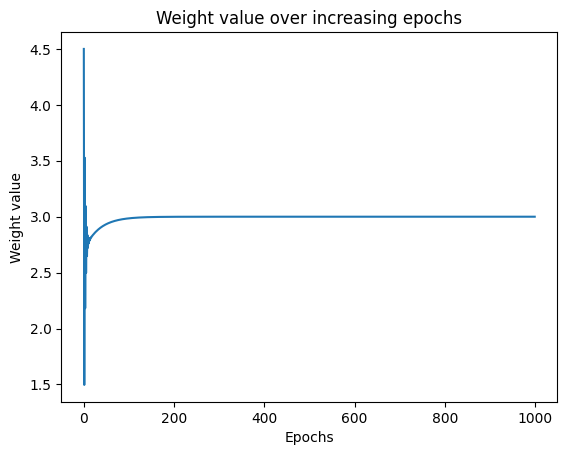

In [49]:
W = [np.array([[0]], dtype=np.float32),  # weight
     np.array([[0]], dtype=np.float32)] # bias

weight_value = []
for epx in range(1000):
    W = update_weights(x,y,W,0.1) # lr= 0.1
    weight_value.append(W[0][0][0])

%matplotlib inline
plt.plot(weight_value)
plt.title('Weight value over increasing epochs')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

In [52]:
# With a slightly higher learning rate (0.1), the weight value oscillated initially and then quickly saturated (in fewer epochs)
# to the optimal value.

Text(0, 0.5, 'Weight value')

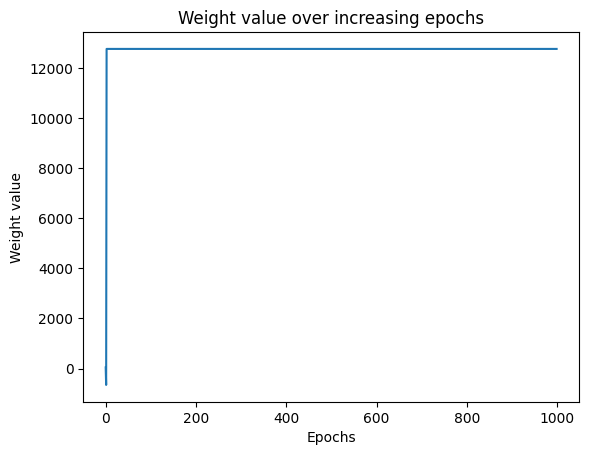

In [51]:
W = [np.array([[0]], dtype=np.float32),  # weight
     np.array([[0]], dtype=np.float32)] # bias

weight_value = []
for epx in range(1000):
    W = update_weights(x,y,W,1) # lr= 1
    weight_value.append(W[0][0][0])

%matplotlib inline
plt.plot(weight_value)
plt.title('Weight value over increasing epochs')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

In [54]:
# When the learning rate was high (1), the weight value spiked to a very high value and was not able to reach the optimal value.

#The reason the weight value did not spike by a large amount when the learning rate was low is that we restricted the weight update
# by an amount that was equal to the gradient * learning rate, essentially resulting in a small amount of weight update when the
# learning rate was small. However, when the learning rate was high, weight update was high, after which the change in loss (when 
# the weight was updated by a small value) was so small that the weight could not achieve the optimal value.

In [55]:
# In order to have a deeper understanding of the interplay between the gradient value, 
# learning rate, and weight value, let's run the update_weights function only for 10 epochs.
# Further, we will print the following values to understand how they vary over increasing epochs:

# 1. Weight value at the start of each epoch 
# 2. Loss prior to weight update 
# 3. Loss when the weight is updated by a small amount 
# 4. Gradient value

def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = feed_forward(inputs, outputs, original_weights)
    updated_weights = deepcopy(weights)

    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, \
                                      temp_weights)
            grad = (_loss_plus - org_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
            if(i % 2 == 0): # since we have weights at index 0 and bias at index 1, we want index 0 value
                print('weight value:', \
                      np.round(original_weights[i][index],2), \
                      'original loss:', np.round(org_loss,2), \
                      'loss_plus:', np.round(_loss_plus,2), \
                      'gradient:', np.round(grad,2), \
                      'updated_weights:', \
                      np.round(updated_weights[i][index],2))
    return updated_weights

weight value: 0.0 original loss: 67.5 loss_plus: 67.5 gradient: -45.0 updated_weights: 0.45
weight value: 0.45 original loss: 46.88 loss_plus: 46.88 gradient: -37.49 updated_weights: 0.82
weight value: 0.82 original loss: 32.57 loss_plus: 32.57 gradient: -31.26 updated_weights: 1.14
weight value: 1.14 original loss: 22.64 loss_plus: 22.64 gradient: -26.05 updated_weights: 1.4
weight value: 1.4 original loss: 15.75 loss_plus: 15.75 gradient: -21.72 updated_weights: 1.62
weight value: 1.62 original loss: 10.97 loss_plus: 10.97 gradient: -18.1 updated_weights: 1.8
weight value: 1.8 original loss: 7.65 loss_plus: 7.65 gradient: -15.09 updated_weights: 1.95
weight value: 1.95 original loss: 5.35 loss_plus: 5.35 gradient: -12.59 updated_weights: 2.07
weight value: 2.07 original loss: 3.75 loss_plus: 3.75 gradient: -10.49 updated_weights: 2.18
weight value: 2.18 original loss: 2.64 loss_plus: 2.64 gradient: -8.75 updated_weights: 2.27
[array([[2.265477]], dtype=float32), array([[0.7404298]], 

Text(0.5, 1.0, 'Weight value over increasing epochs when learning rate is 0.01')

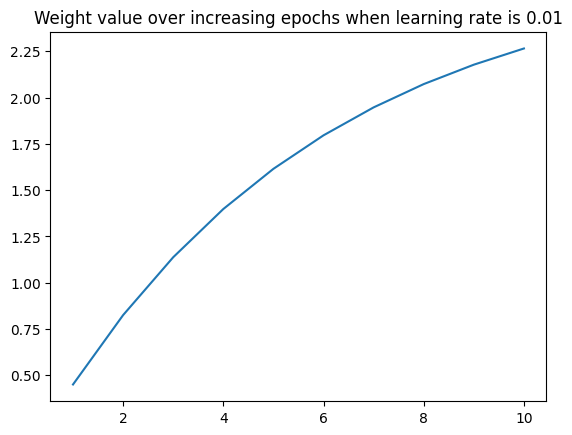

In [56]:
# At lr = 0.01

W = [np.array([[0]], dtype=np.float32), 
     np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(10):
    W = update_weights(x,y,W,0.01)
    weight_value.append(W[0][0][0])
print(W)
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 11)
plt.plot(epochs,weight_value)
plt.title('Weight value over increasing epochs when learning rate is 0.01')

weight value: 0.0 original loss: 67.5 loss_plus: 67.5 gradient: -45.0 updated_weights: 4.5
weight value: 4.5 original loss: 30.37 loss_plus: 30.38 gradient: 30.04 updated_weights: 1.5
weight value: 1.5 original loss: 13.79 loss_plus: 13.78 gradient: -20.31 updated_weights: 3.53
weight value: 3.53 original loss: 6.25 loss_plus: 6.26 gradient: 13.46 updated_weights: 2.18
weight value: 2.18 original loss: 2.85 loss_plus: 2.85 gradient: -9.14 updated_weights: 3.1
weight value: 3.1 original loss: 1.33 loss_plus: 1.33 gradient: 5.97 updated_weights: 2.5
weight value: 2.5 original loss: 0.65 loss_plus: 0.65 gradient: -4.12 updated_weights: 2.91
weight value: 2.91 original loss: 0.34 loss_plus: 0.34 gradient: 2.63 updated_weights: 2.65
weight value: 2.65 original loss: 0.2 loss_plus: 0.2 gradient: -1.88 updated_weights: 2.84
weight value: 2.84 original loss: 0.13 loss_plus: 0.13 gradient: 1.14 updated_weights: 2.72
[array([[2.7217765]], dtype=float32), array([[0.6589097]], dtype=float32)]


Text(0.5, 1.0, 'Weight value over increasing epochs when learning rate is 0.1')

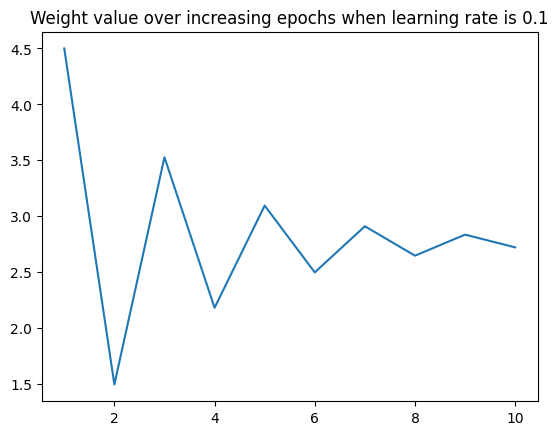

In [57]:
# At lr = 0.1

W = [np.array([[0]], dtype=np.float32), 
     np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(10):
    W = update_weights(x,y,W,0.1)
    weight_value.append(W[0][0][0])
print(W)
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 11)
plt.plot(epochs,weight_value)
plt.title('Weight value over increasing epochs when learning rate is 0.1')

weight value: 0.0 original loss: 67.5 loss_plus: 67.5 gradient: -45.0 updated_weights: 45.0
weight value: 45.0 original loss: 16604.45 loss_plus: 16604.52 gradient: 699.22 updated_weights: -654.22
weight value: -654.22 original loss: 4030779.1 loss_plus: 4030777.76 gradient: -13409.38 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weig

Text(0.5, 1.0, 'Weight value over increasing epochs when learning rate is 1')

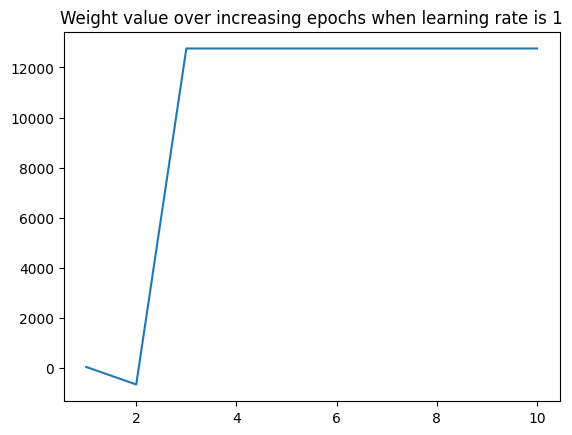

In [58]:
# At lr = 1

W = [np.array([[0]], dtype=np.float32), 
     np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(10):
    W = update_weights(x,y,W,1)
    weight_value.append(W[0][0][0])
print(W)
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 11)
plt.plot(epochs,weight_value)
plt.title('Weight value over increasing epochs when learning rate is 1')

In [59]:
# In general, it is better to have a low learning rate. This way, the model is able to learn slowly but will adjust the weights 
# towards an optimal value. Typical learning rate parameter values range between 0.0001 and 0.01.

# Neural Network Training Process Summary:

- It is a process of coming up with optimal weights for a neural network architecture by repeating the two key steps, forward-propagation and backpropagation with a given learning rate. 

- In forward-propagation, we apply a set of weights to the input data, pass it through the defined hidden layers, perform the defined nonlinear activation on the hidden layers' output, and then connect the hidden layer to the output  layer by multiplying the hidden-layer node values with another set of weights to estimate the output value. Then, we finally calculate the overall loss corresponding to the given set of weights. For the first forward-propagation, the values of the weights are initialized randomly. In backpropagation, we decrease the loss value (error) by adjusting weights in a direction that reduces the overall loss. Further, the magnitude of the weight update is the gradient times the learning rate. The process of feedforward propagation and backpropagation is repeated until we achieve as minimal a loss as possible. This implies that, at the end of the training, the neural network has adjusted its weights  such that it predicts the output that we want it to predict. In the preceding toy example, after training, the updated network will predict a value of 0 as output when {1,1} is fed as input as it is trained to achieve that.

# More on Loss Functions:

The loss function used in training neural networks varies depending on the type of dependent variable (output) in your model. Here’s how they differ:

1. Continuous Dependent Variable: For regression problems where the dependent variable is continuous, common loss functions include:

Mean Squared Error (MSE): Measures the average squared difference between the predicted and actual values. It penalizes larger errors more than smaller ones.

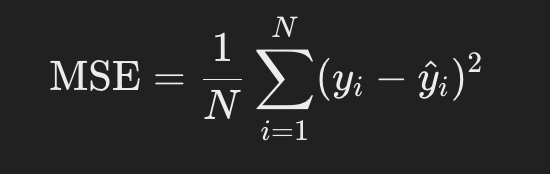

In [ ]:
Mean Absolute Error (MAE): Measures the average absolute difference between the predicted and actual values. It is more robust to outliers compared to MSE.


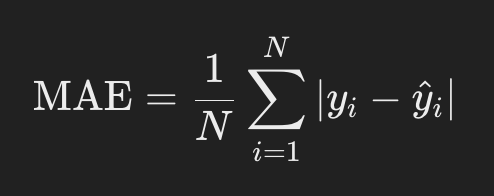

In [ ]:

2. Binary Dependent Variable:
For binary classification problems where the dependent variable is binary (e.g., 0 or 1), the common loss function is:

Binary Cross-Entropy (Log Loss): Measures the performance of a classification model whose output is a probability value between 0 and 1. It is defined as:



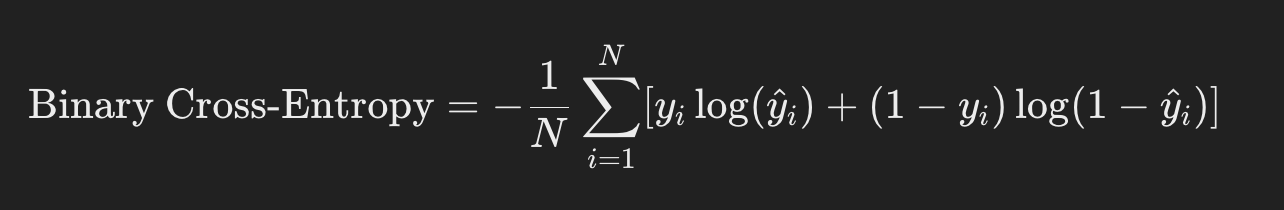

In [ ]:

3. Categorical Dependent Variable:
For multi-class classification problems where the dependent variable has more than two categories, the common loss function is:

4. Categorical Cross-Entropy: Measures the performance of a classification model whose output is a probability distribution over multiple classes. It is defined as:

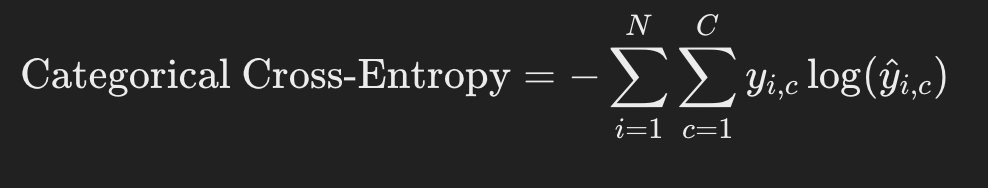

# Summary:

Continuous Dependent Variable: Uses loss functions like MSE and MAE to measure prediction errors for regression tasks.
Binary Dependent Variable: Uses Binary Cross-Entropy to evaluate the performance of binary classification models.
Categorical Dependent Variable: Uses Categorical Cross-Entropy for multi-class classification tasks to measure the performance of models predicting a distribution over several classes.
These loss functions are tailored to handle the specific nature of the output variable, ensuring the model is optimized appropriately for the given task.

# Questions to think about:

1. What are the various layers in a neural network?
2. What is the output of feedforward propagation? 
3. How is the loss function of a continuous dependent variable different from that of a binary dependent variable and also of a categorical dependent variable?
4. What is stochastic gradient descent?
5. What does a backpropagation exercise do?
6. How does a weight update of all the weights across layers happen during backpropagation?
7. Which functions of a neural network happen within each epoch of training a neural network?
8. Why is training a network on a GPU faster when compared to training it on a CPU?
9. How does the learning rate impact training a neural network?
10. What is the typical value of the learning rate parameter?